In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Loading Fashion Mnist dataset

fashion_train = pd.read_csv("fashion-mnist_train.csv")
fashion_test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test.shape

(10000, 785)

In [6]:
fashion_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
X_train_fashion = fashion_train.drop('label', axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label', axis = 1)
y_test_fashion = fashion_test['label']

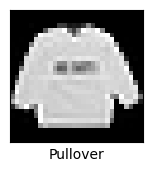

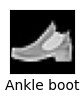

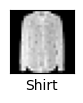

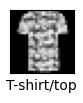

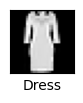

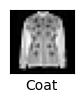

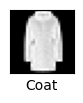

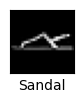

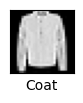

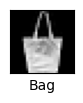

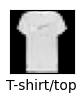

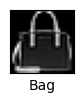

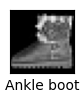

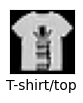

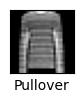

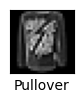

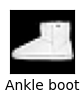

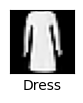

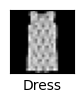

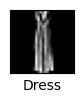

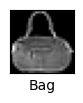

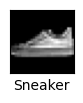

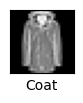

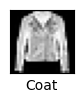

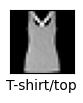

In [8]:
# Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)     # -1 refers to all images
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

# Names of clothing accessories in order
col_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizing the images
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap = 'grey')
    plt.xlabel(col_names[y_train_fashion[i]])
    plt.show()

In [9]:
y_train_fashion = to_categorical(y_train_fashion, num_classes = 10)
y_test_fashion = to_categorical(y_test_fashion, num_classes =10)

In [10]:
# Creating base neural network

model = keras.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation = 'softmax'),
])
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train_fashion, y_train_fashion, batch_size = 100, epochs = 30, validation_data = (X_test_fashion, y_test_fashion))

C:\Users\Hxtreme\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.6173 - loss: 1.1516 - val_accuracy: 0.8260 - val_loss: 0.5368
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7460 - loss: 0.7516 - val_accuracy: 0.8396 - val_loss: 0.4799
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7703 - loss: 0.6785 - val_accuracy: 0.8433 - val_loss: 0.4655
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7879 - loss: 0.6364 - val_accuracy: 0.8532 - val_loss: 0.4348
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7945 - loss: 0.6180 - val_accuracy: 0.8510 - val_loss: 0.4857
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8031 - loss: 0.5949 - val_accuracy: 0.8543 - val_loss: 0.4812
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8081 - loss: 0.5782 - val_accuracy: 0.8588 - val_loss: 0.4923
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8086 - loss: 0.5759 - v

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,688 (1.20 MB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

 Optimizer params: 209,558 (818.59 KB)

In [12]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8685 - loss: 0.3835


In [13]:
print("Fashion MNIST Test accuracy:", round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8685


In [14]:
print("Fashion MNIST Test Loss:", round(test_loss_fashion,4))

Fashion MNIST Test Loss: 0.3835


In [15]:
# Predicting the labels fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash = np.argmax(y_predict_fash, axis = 1)
y_test_fash_eval = np.argmax(y_test_fashion, axis = 1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


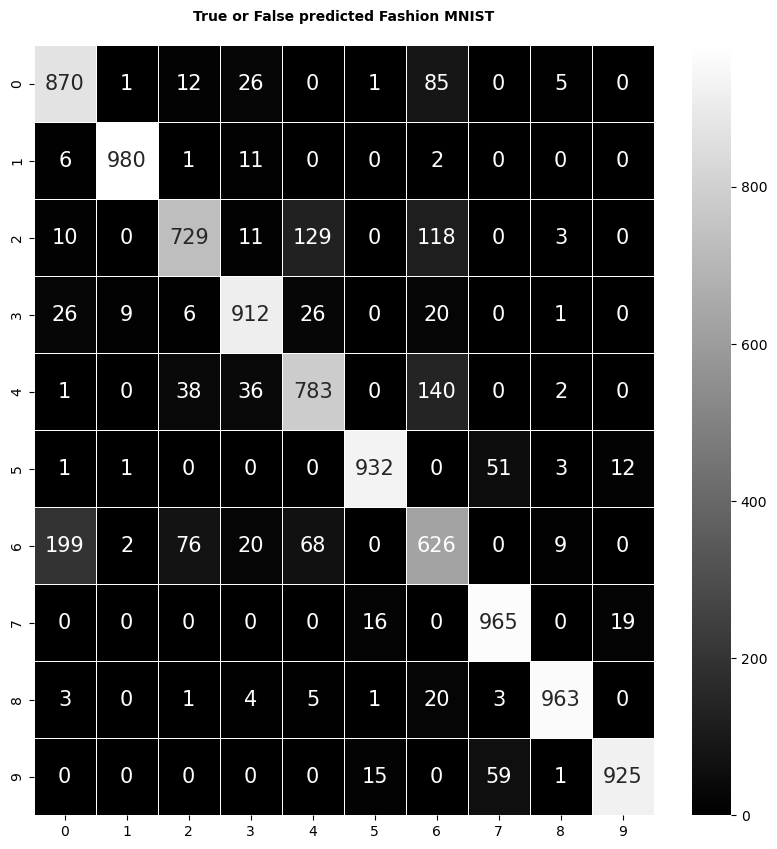

In [16]:
con_matrix = confusion_matrix(y_test_fash_eval, y_predict_fash)
#plt.style.use('seaborn-deep')
plt.figure(figsize = (10,10))
sns.heatmap(con_matrix, annot = True, annot_kws={'size':15}, linewidths = 0.5, fmt = "d", cmap = "grey")
plt.title("True or False predicted Fashion MNIST\n", fontweight = "bold", fontsize = 10)
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval, y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.73      0.78      1000
           3       0.89      0.91      0.90      1000
           4       0.77      0.78      0.78      1000
           5       0.97      0.93      0.95      1000
           6       0.62      0.63      0.62      1000
           7       0.90      0.96      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


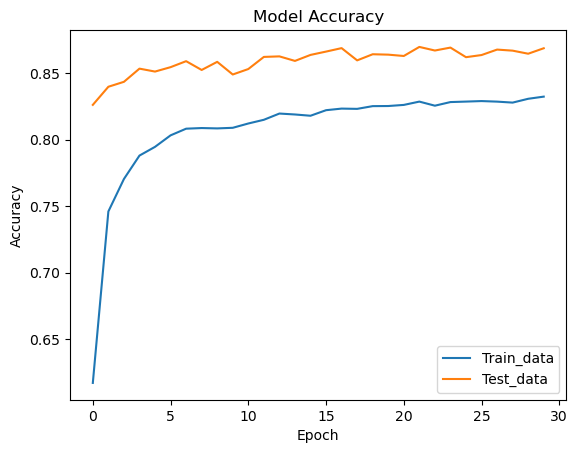

In [19]:
# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_data','Test_data'], loc = 'best')
plt.show()

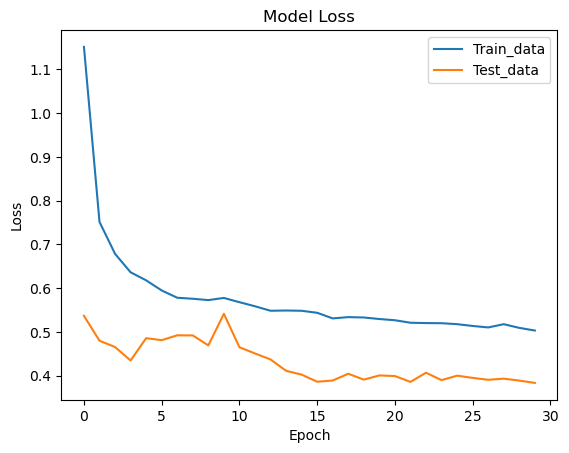

In [20]:
#Loss Graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_data', 'Test_data'], loc = 'best')
plt.show()

In [40]:
# tf.expand_dimension(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[3],:].values)
print(y_predict)
y_predict = np.argmax(y_predict, axis=1)
print(y_predict)
y_test_digit_eval = np.argmax(y_test_fashion, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[6.6768013e-02 1.3154873e-04 5.0766206e-01 9.6982131e-03 3.2915872e-02
  1.2970431e-04 3.7471160e-01 5.1056712e-05 7.8409016e-03 9.1045578e-05]]
[2]


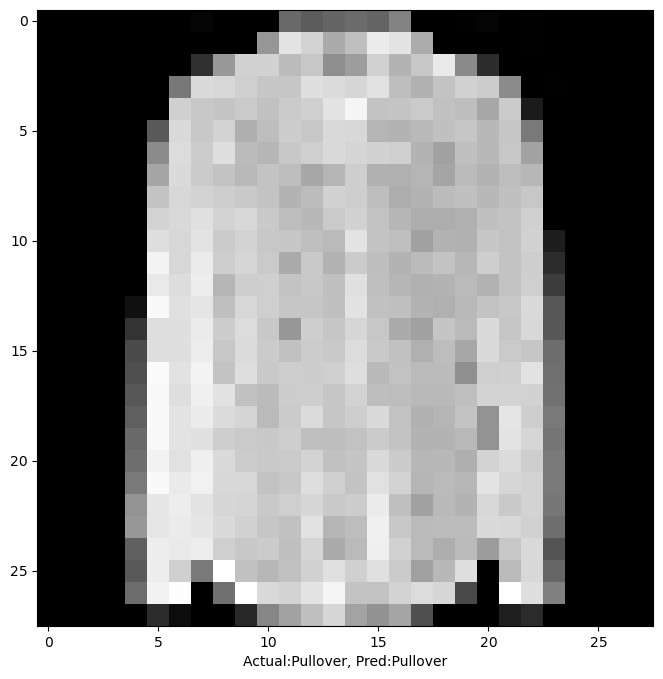

In [41]:
col_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Visualizing the digits
plt.figure(figsize = (8,8))
plt.imshow(x_train_reshape[2],cmap = 'grey')
plt.xlabel("Actual:{}, Pred:{}".format(col_names[np.argmax(y_test_fashion[2])], col_names[y_predict[0]]))
plt.show()